# Optics Lab: Brewster's Angle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, pstdev
plt.style.use('seaborn-whitegrid')
import scipy.optimize
from scipy import signal
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 2})

Index rifr from fit: 1.4804 +- 0.0566108, from graph: 0.014
Brewster Angle from fit: 55.9612 +- 1.01629
Index I0 from fit: 474.428 +- 29.5072, from graph: 12
Index rifr from fit parallel: 1.41993 +- 0.173911, from graph: 0.0566108
Brewster Angle from fit parallel: 54.8446 +- 3.3036
Index I0 from fit parallel: 669.88 +- 325.016, from graph: 325.016


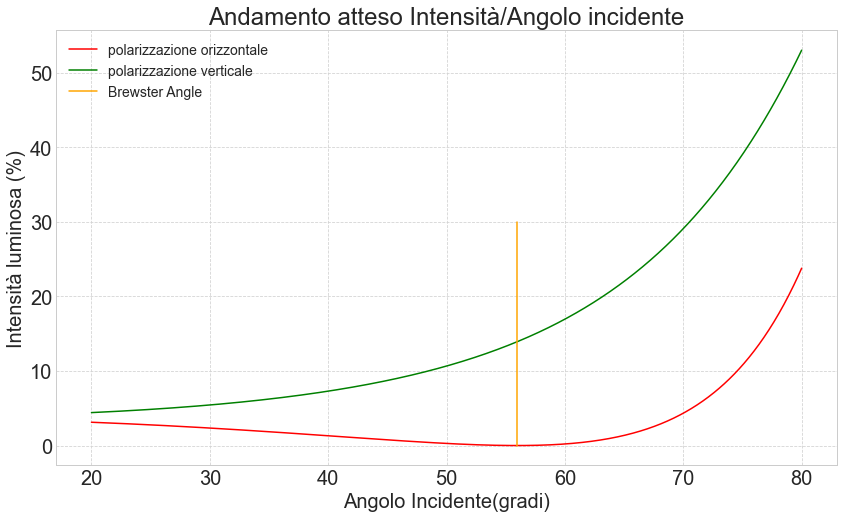

Brewster Angle data range from minimum dati grezzi (graph): [52,58]
Brewster Angle Simulated data mean from minimum dati grezzi (graph): 55 +- 3
Refraction Index from minimum dati grezzi: 1.42815 +- 0.0912867


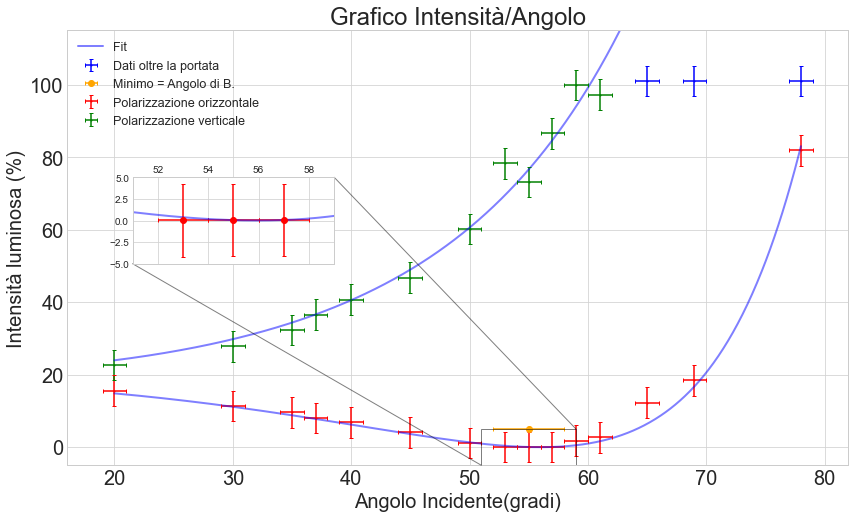

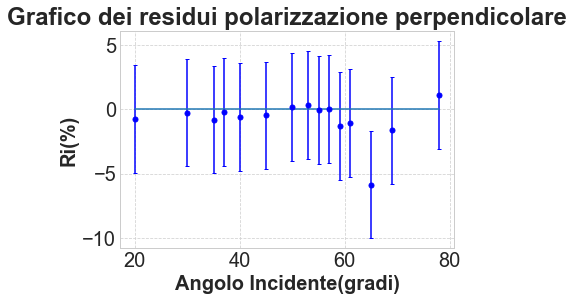

sigma_post_fit
1.7572671377749938
t sigma dalla media polarizzazione perpendicolare
[0.65360745 0.93522776 0.61416366 0.08825995 0.27153585 0.33415586
 0.11668672 0.45296172 0.01661978 0.20266331 0.00634241 0.74406958
 0.42993401 0.14277368 3.33297488]
N*probabilità per la polarizzazione perpendicolare, se <0.5 si può rigettare
[2.75041134 2.19905197 2.82004636 3.39212619 3.28210823 3.22045212
 3.38225935 3.07333924 3.4048937  3.3361439  3.40529548 2.58191676
 3.10474071 3.37083223 0.0131806 ]


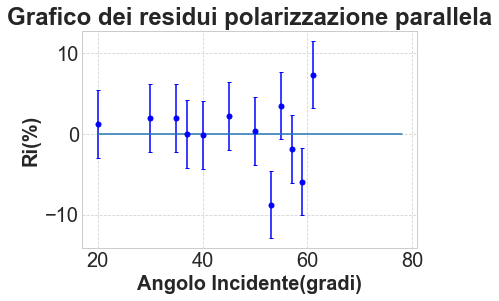

sigma_post_fit
4.219173666121559
t sigma dalla media polarizzazione parallela
[0.28887143 0.4740112  1.74516254 0.08727654 0.52004791 0.03230462
 0.0057402  0.46716642 0.8352441  2.07279801 0.44616974 1.39846152]
N*probabilità per la polarizzazione parallela, se <0.5 si può rigettare
[1.08828762 1.01408377 0.24746965 1.13034198 0.99114336 1.1340633
 1.13463651 1.01735547 0.80052499 0.13240141 1.02715732 0.4267664 ]


In [2]:
import numpy as np
def findMinWithRange(xdata,Idata,error):  

  minimum = np.argmin(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]<Idata[minimum]+error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i
  minimumIndex = np.array([minimumsx,minimumdx])
  return minimumIndex

def findMaxWithRange(xdata,Idata,error):  

  minimum = np.argmax(Idata)
  minimumsx = minimumdx = minimum
  minimumsxvalue = minimumdxvalue = xdata[minimum]
  for i in range(len(xdata)):
    if(Idata[i]>Idata[minimum]-error):
      if(minimumsxvalue>xdata[i]):
        minimumsxvalue = xdata[i]
        minimumsx = i
      if(minimumdxvalue<xdata[i]):
        minimumdxvalue = xdata[i]
        minimumdx = i
  minimumIndex = np.array([minimumsx,minimumdx])
  return minimumIndex

#ANALISI

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
#indice di rifrazione simulato

#Brewster angle simulato
theta = 56.34177390487406

def simulation(thetai, thetat):
  return (np.tan(thetai-thetat)**2/np.tan(thetai+thetat)**2)
def simulationPerpendicular(thetai, thetat):
  return (np.sin(thetai-thetat)**2/np.sin(thetai+thetat)**2)
def fitting(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting1(thetai, indexrifr, I0):
  return I0*(np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fittingParallel(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fitting3(thetai, indexrifr, I0):
  return I0*(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)
def fittingPerpendicular(thetai, indexrifr):
  return (np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)

n = 1.4281480067421144

#input data
Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,12.3,15.6,11.4])
Idata1 = Idata = np.array([81.9,18.4,2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,15.6,11.4,12.3])
Idata12 = Idata2 = np.array([101.1,101.1,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9,101.1,22.75,27.8])

Angle = 90-np.array([12,21,29,40,45,50,53,55,35,37,33,31,70,60,25])
Angle = Angle/180*np.pi
Angle_err = 1

Idata_err = Idata_err1 = 4.2

#fitting
popt, pcov = scipy.optimize.curve_fit(fitting1, Angle, Idata1, p0 = np.array([n,500]), sigma=0.8*np.ones(len(Idata1)))
indexrifr_err,I0_err = np.sqrt(np.diag(pcov))
indexrifr,I0 = popt

#print fitting result
print(('Index rifr from fit: %g +- %g, from graph: %g')%(indexrifr,indexrifr_err*3, 0.014))
print(('Brewster Angle from fit: %g +- %g')%(np.arctan(indexrifr)*180/np.pi,(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)*3))
print(('Index I0 from fit: %g +- %g, from graph: %g')%(I0, I0_err*3, 12))

Angle1cut = (90-np.array([70,60,29,40,45,50,53,55,35,37,33,31]))
Idata2cut = np.array([22.75,27.8,97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9])

popt, pcov = scipy.optimize.curve_fit(fitting3, Angle1cut/180*np.pi,Idata2cut , p0 = np.array([n,I0]), sigma=1.3*np.ones(len(Idata2cut)))
indexrifr_err1,I0_err1 = np.sqrt(np.diag(pcov))
indexrifr1,I01 = popt

#print fitting result
print(('Index rifr from fit parallel: %g +- %g, from graph: %g')%(indexrifr1,indexrifr_err1*3,indexrifr_err*3))
print(('Brewster Angle from fit parallel: %g +- %g')%(np.arctan(indexrifr1)*180/np.pi, (1/(1+indexrifr1**2)*indexrifr_err1*180/np.pi)*3))
print(('Index I0 from fit parallel: %g +- %g, from graph: %g')%(I01,I0_err1*3,I0_err1*3))



#plot data
x = np.linspace(np.min(Angle),np.max(Angle),1000)
x1 = np.arcsin(np.sin(x)/(indexrifr))
Idatafit1 = Idatafit = simulation(x,x1)
x3 = np.arcsin(np.sin(x)/indexrifr1)
Idatafitparallel = simulationPerpendicular(x,x3)


fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
#plt.ylim(0,20)
plt.title("Andamento atteso Intensità/Angolo incidente")
plt.xlabel("Angolo Incidente(gradi)")
plt.ylabel("Intensità luminosa (%)")

xsimul = np.linspace(20,80,1000)
xsimul = xsimul/180*np.pi
x1simul = np.arcsin(np.sin(xsimul)/(1.48))
ysimul = simulation(xsimul,x1simul)
y2simul = simulationPerpendicular(xsimul,x1simul)

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(xsimul*180/np.pi,ysimul*100, color = 'red', label='polarizzazione orizzontale')
plt.plot(xsimul*180/np.pi,y2simul*100, color = 'green', label='polarizzazione verticale')
plt.plot(np.ones(1000)*55.95,np.linspace(0,30,1000),color='orange',label='Brewster Angle')
plt.legend(loc="upper left",prop={'size': 14})
plt.show()

#print data result dati grezzi
minimum = findMinWithRange(Angle,Idata,0.1)
BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-2*Angle_err/180*np.pi-Angle[minimum[1]])*90/np.pi
print(('Brewster Angle data range from minimum dati grezzi (graph): [%g,%g]')%(Angle[minimum[0]]*180/np.pi-Angle_err,Angle[minimum[1]]*180/np.pi+Angle_err))
print(('Brewster Angle Simulated data mean from minimum dati grezzi (graph): %g +- %g')%((Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi,np.abs(Angle[minimum[0]]-2*Angle_err/180*np.pi-Angle[minimum[1]])*90/np.pi))
print(('Refraction Index from minimum dati grezzi: %g +- %g')%(np.tan(BrewsterDataAngle/180*np.pi),1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi))

#graphs with zoom
fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20, 'font.weight':'normal'})
ax = fig.gca()
#ax.set_xticks(np.arange(min(Angletot),max(Angletot)*1.5, 10)
plt.title("Grafico Intensità/Angolo")
plt.xlabel("Angolo Incidente(gradi)")
plt.ylabel("Intensità luminosa (%)")
plt.ylim(-5,115)
plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.plot(x*180/np.pi,Idatafitparallel*(I01), color = 'blue', label='Fit', linewidth=2,alpha= 0.5)
plt.plot(x*180/np.pi,Idatafit*(I0), color = 'blue', linewidth=2,alpha= 0.5)
plt.errorbar(90-np.array([12,21,25]),np.array([101.1,101.1,101.1]),xerr=Angle_err,yerr=Idata_err1,color='blue',label='Dati oltre la portata', fmt='o',markersize=1)
plt.errorbar(BrewsterDataAngle,5,xerr=BrewsterDataAngleErr, color='orange', label='Minimo = Angolo di B.', fmt='o')
plt.errorbar(Angle*180/np.pi,Idata,xerr=Angle_err,yerr=Idata_err,color='red', label='Polarizzazione orizzontale',fmt='o',markersize=1)
plt.errorbar(Angle1cut,Idata2cut,xerr=Angle_err,yerr=Idata_err,color='green', label='Polarizzazione verticale',fmt='o',markersize=1)
plt.legend(loc="best",prop={'size': 12.5})

X_detail = np.linspace(51, 59, 1000)
X_detail = X_detail/180*np.pi
x1 = np.arcsin(np.sin(X_detail)/indexrifr)
Y_detail = Idatafit = fitting1(X_detail,indexrifr,I0)

# location for the zoomed portion 
sub_axes = plt.axes([.19, .475, .2, .15]) 
sub_axes.xaxis.tick_top()
sub_axes.set_ylim([-5, 5])
sub_axes.set_xlim([51, 59])
sub_axes.tick_params(axis='both', which='major', labelsize=10)
plt.errorbar((90-np.array([35,37,33])),np.array([0.073,0.022,0.0452]),xerr=Angle_err,yerr=Idata_err,color='red', label='Dati',fmt='o')
sub_axes.plot(X_detail*180/np.pi,Y_detail, color="blue",label="Fit", linewidth=2,alpha = 0.5)

# plot the zoomed portion
sub_axes.grid(color='lightgray',linestyle="-",zorder=0)
ax.indicate_inset_zoom(sub_axes, edgecolor="black")
plt.show()

#grafico residui perpendicolare
Ff = fitting1(Angle,indexrifr,I0)
Ri2 = Ff-Idata1

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui polarizzazione perpendicolare",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Ri(%)",fontweight="bold")
plt.plot(np.linspace(np.min(Angle*180/np.pi),np.max(Angle*180/np.pi),1000),np.zeros(1000))
plt.errorbar(Angle*180/np.pi, Ri2, markersize = 5, color="blue", yerr=Idata_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()

sigma_post_fit = (np.sum((Ff-Idata1)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

t = np.abs(Ri2)/sigma_post_fit
print('t sigma dalla media polarizzazione perpendicolare')
print(t)
print('N*probabilità per la polarizzazione perpendicolare, se <0.5 si può rigettare')
print(scipy.stats.norm(Ff,sigma_post_fit).pdf(Idata1)*len(Idata1))

#grafico residui parallela
Ff = fitting3(Angle1cut/180*np.pi,indexrifr1,I01)
Ri2 = Ff-Idata2cut

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui polarizzazione parallela",fontweight="bold")
plt.xlabel("Angolo Incidente(gradi)",fontweight="bold")
plt.ylabel("Ri(%)",fontweight="bold")
plt.plot(np.linspace(np.min(Angle*180/np.pi),np.max(Angle*180/np.pi),1000),np.zeros(1000))
plt.errorbar(Angle1cut, Ri2, markersize = 5, color="blue", yerr=Idata_err, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()

sigma_post_fit = (np.sum((Ff-Idata2cut)**2)/(len(Ff)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

t = np.abs(Ri2)/sigma_post_fit
print('t sigma dalla media polarizzazione parallela')
print(t)
print('N*probabilità per la polarizzazione parallela, se <0.5 si può rigettare')
print(scipy.stats.norm(Ff,sigma_post_fit).pdf(Idata2cut)*len(Idata2cut))

Brewster Angle data range from minimum normalized data [52,58]
Brewster Angle Simulated data mean from minimum: 55 +- 3
Refraction Index from minimum: 1.42815 +- 1.68259

Brewster Angle Simulated from maximum mean [52,58]
Brewster Angle Simulated data mean from minimum: 55 +- 3
Refraction Index from maximum: 1.42815 +- 1.68259

Index rifr from fit: 1.43301 +- 0.0333462, from graph: 0.07
Brewster Angle from fit: 55.0914 +- 0.625707
Index I0 from fit: 474.428 +- 29.5072, from graph: 12

Index rifr from fit parallel: 1.41993 +- 0.173911, from graph: 0.0333462
Brewster Angle from fit parallel: 54.8446 +- 3.3036
Index I0 from fit parallel: 669.88 +- 325.016, from graph: 325.016


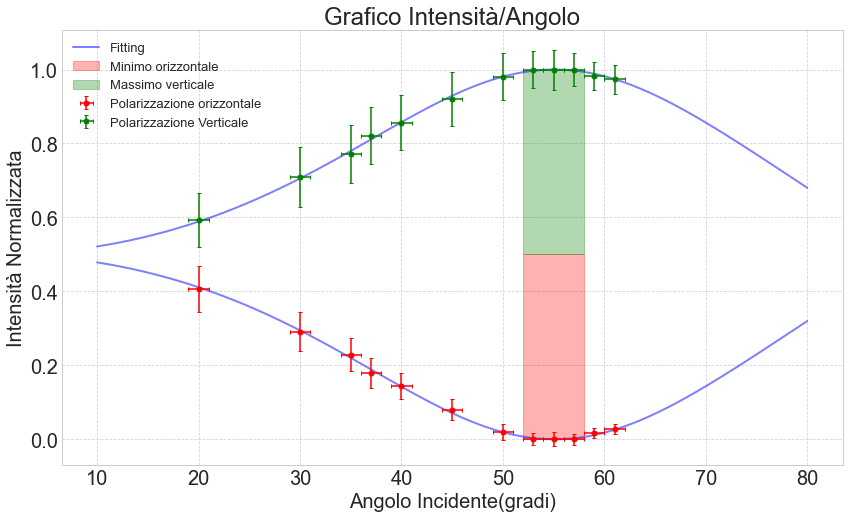

In [3]:
def fittingParallel(thetai, indexrifr):
  return (np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)/((np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)+(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2))
def fittingPerpendicular(thetai, indexrifr):
  return (np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)/((np.tan(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.tan(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2)+(np.sin(thetai-np.arcsin(np.sin(thetai)/indexrifr))**2/np.sin(thetai+np.arcsin(np.sin(thetai)/indexrifr))**2))

#\frac{tan(\theta_{i} - arcsin (\frac{sin(\theta_{i})}{n}))^2}{tan(\theta_{i} - arcsin (\frac{sin(\theta_{i})}{n}}

n = 1.48
#simulation
thetai = np.linspace(0.01,np.pi/2,1000)
thetat = np.arcsin(np.sin(thetai)/n)

Isimulated = simulation(thetai,thetat)
Isimulated2 = simulationPerpendicular(thetai,thetat)
Itot = Isimulated+Isimulated2
Isimulated = Isimulated/Itot
Isimulated2 = Isimulated2/Itot

#data
Idata0 = np.array([2.7,1.18,4.1,6.82,8,9.6,0.073,0.022,0.0452,1.84,15.6,11.4])
Idata02 = np.array([97.3,60.2,46.8,40.7,36.6,32.4,73.1,78.3,86.6,99.9,22.75,27.8])
Idataerr = 1.3
Angle0 = 90-np.array([29,40,45,50,53,55,35,37,33,31,70,60])
Idata1 = Idata = Idata0
Idata12 = Idata2 = Idata02
Idatatot = Idata+Idata2

#propagazione errori
Idatatoterr = Idataerr+Idataerr
Idataerrrel = (Idatatoterr/Idatatot + Idataerr/Idata)
Idataerrrel2 = (Idatatoterr/Idatatot + Idataerr/Idata2)
Idata = Idata/Idatatot
Idataerr = Idataerrrel*Idata
Idata2 = Idata2/Idatatot
Idataerr2 = Idataerrrel2*Idata2
Angleerr = 1
Angle = Angle0/180*np.pi

#print data result
minimum = findMinWithRange(Angle,Idata,0.01)
maximum = findMaxWithRange(Angle,Idata2,0.01)


BrewsterDataAngle = (Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi
BrewsterDataAngleErr = np.abs(Angle[minimum[0]]-Angle[minimum[1]]+2*Angleerr)*90/np.pi

print(('Brewster Angle data range from minimum normalized data [%g,%g]')%(Angle[minimum[0]]*180/np.pi-Angle_err,Angle[minimum[1]]*180/np.pi+Angle_err))
print(('Brewster Angle Simulated data mean from minimum: %g +- %g')%((Angle[minimum[0]]+Angle[minimum[1]])*90/np.pi,np.abs(Angle[minimum[0]]-2*Angle_err/180*np.pi-Angle[minimum[1]])*90/np.pi))
print(('Refraction Index from minimum: %g +- %g')%(np.tan(BrewsterDataAngle/180*np.pi),1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi))

BrewsterDataAngle = (Angle[maximum[0]]+Angle[maximum[1]])*90/np.pi
BrewsterDataAngleErr = np.abs(Angle[maximum[0]]-Angle[maximum[1]]+2*Angleerr)*90/np.pi
print("")
print(('Brewster Angle Simulated from maximum mean [%g,%g]')%(Angle[maximum[0]]*180/np.pi-Angle_err,Angle[maximum[1]]*180/np.pi+Angle_err))
print(('Brewster Angle Simulated data mean from minimum: %g +- %g')%((Angle[maximum[0]]+Angle[maximum[1]])*90/np.pi,np.abs(Angle[maximum[0]]-2*Angle_err/180*np.pi-Angle[maximum[1]])*90/np.pi))
print(('Refraction Index from maximum: %g +- %g')%(np.tan(BrewsterDataAngle/180*np.pi),1/np.cos(BrewsterDataAngle/180*np.pi)*BrewsterDataAngleErr/180*np.pi))

#fitting
popt, pcov = scipy.optimize.curve_fit(fittingParallel, Angle, Idata, p0 = np.array([n]))
indexrifr_err = np.sqrt(np.diag(pcov))
indexrifr = popt

#print fitting result
print("")
print(('Index rifr from fit: %g +- %g, from graph: %g')%(indexrifr,indexrifr_err*3, 0.07))
print(('Brewster Angle from fit: %g +- %g')%(np.arctan(indexrifr)*180/np.pi,(1/(1+indexrifr**2)*indexrifr_err*180/np.pi)*3))
print(('Index I0 from fit: %g +- %g, from graph: %g')%(I0, I0_err*3, 12))

x = np.linspace(10*np.pi/180,80*np.pi/180,1000)
x1 = np.arcsin(np.sin(x)/indexrifr)
Idatafit = simulation(x,x1)
Idatafitperpendicular = simulationPerpendicular(x,x1)
y = Idatafit/(Idatafit+Idatafitperpendicular)
yperpendicular = Idatafitperpendicular/(Idatafit+Idatafitperpendicular)

popt, pcov = scipy.optimize.curve_fit(fittingPerpendicular, Angle, Idata2, p0 = np.array([n]))
indexrifr_errPerp = np.sqrt(np.diag(pcov))
indexrifrPerp = popt

#print fitting result
print("")
print(('Index rifr from fit parallel: %g +- %g, from graph: %g')%(indexrifr1,indexrifr_err1*3,indexrifr_err*3))
print(('Brewster Angle from fit parallel: %g +- %g')%(np.arctan(indexrifr1)*180/np.pi, (1/(1+indexrifr1**2)*indexrifr_err1*180/np.pi)*3))
print(('Index I0 from fit parallel: %g +- %g, from graph: %g')%(I01,I0_err1*3,I0_err1*3))

xPerp = np.linspace(10*np.pi/180,80*np.pi/180,1000)
x1Perp = np.arcsin(np.sin(xPerp)/indexrifrPerp)
IdatafitPerp = simulation(xPerp,x1Perp)
IdatafitperpendicularPerp = simulationPerpendicular(xPerp,x1Perp)
yPerp = IdatafitPerp/(IdatafitPerp+IdatafitperpendicularPerp)
yperpendicularPerp = IdatafitperpendicularPerp/(IdatafitPerp+IdatafitperpendicularPerp)

#graph
fig = plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 20})
ax = fig.gca()
plt.title("Grafico Intensità/Angolo")
plt.xlabel("Angolo Incidente(gradi)")
plt.ylabel("Intensità Normalizzata")
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.plot(x*180/np.pi,y,color='blue', label='Fitting', linewidth=2, alpha=0.5)
plt.plot(xPerp*180/np.pi,yperpendicularPerp,color='blue', linewidth=2, alpha=0.5)
plt.errorbar(Angle*360/np.pi/2,Idata,xerr=Angleerr,yerr=Idataerr, fmt='o', markersize = 5, zorder=5, color = "red", label = "Polarizzazione orizzontale")
plt.errorbar(Angle*360/np.pi/2,Idata2,xerr=Angleerr, yerr=Idataerr2,fmt='o', markersize = 5, zorder=5, color = "green", label = "Polarizzazione Verticale")
plt.fill_between(np.linspace(Angle[minimum[0]]*180/np.pi-Angleerr,Angle[minimum[1]]*180/np.pi+Angleerr,100),np.zeros(100),np.ones(100)*0.5,color='red',label='Minimo orizzontale', alpha=0.3)
plt.fill_between(np.linspace(Angle[maximum[0]]*180/np.pi-Angleerr,Angle[maximum[1]]*180/np.pi+Angleerr,100),np.ones(100),np.ones(100)*0.5,color='green',label='Massimo verticale', alpha=0.3)
plt.legend(loc="upper left",prop={'size': 13})
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()